# Importing librarys

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [ ]:
nvda_medium_data = yf.download("NVDA", period="2y", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [ ]:
nvda_medium_data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Datetime,,,,,
2023-01-30 14:30:00+00:00,19.635050,20.139999,19.511000,19.950001,13533186
2023-01-30 15:30:00+00:00,19.646000,19.696001,19.425030,19.638000,7116478
2023-01-30 16:30:00+00:00,19.521500,19.711500,19.478001,19.647999,5614872
2023-01-30 17:30:00+00:00,19.497999,19.570990,19.397999,19.521500,5285113
2023-01-30 18:30:00+00:00,19.394501,19.497999,19.352499,19.497219,4252225


In [ ]:
# rename the columns "Close", "High", "Low", "Open", "Volume"
nvda_medium_data.columns = ["Close", "High", "Low", "Open", "Volume"]

In [ ]:
nvda_medium_data.tail()

,Close,High,Low,Open,Volume
Datetime,,,,,
2025-01-28 16:30:00+00:00,126.019997,126.639999,120.662003,120.770103,91004183
2025-01-28 17:30:00+00:00,126.089996,126.919998,124.917702,126.014999,61486818
2025-01-28 18:30:00+00:00,126.775002,127.400002,125.452400,126.084999,44202557
2025-01-28 19:30:00+00:00,127.590103,127.870003,126.639999,126.769997,46205682
2025-01-28 20:30:00+00:00,128.980103,129.000000,126.900002,127.589996,50320355


In [ ]:
# download the data
nvda_medium_data.to_csv("nvda_medium_data.csv")

## Loading the data

# Exploratory Analysis

In [2]:
nvda_medium_data = pd.read_csv("nvda_medium_data.csv")

In [3]:
nvda_medium_data.head()

,Datetime,Close,High,Low,Open,Volume
0,2023-01-30 14:30:00+00:00,19.635050,20.139999,19.511000,19.950001,13533186
1,2023-01-30 15:30:00+00:00,19.646000,19.696001,19.425030,19.638000,7116478
2,2023-01-30 16:30:00+00:00,19.521500,19.711500,19.478001,19.647999,5614872
3,2023-01-30 17:30:00+00:00,19.497999,19.570990,19.397999,19.521500,5285113
4,2023-01-30 18:30:00+00:00,19.394501,19.497999,19.352499,19.497219,4252225


In [4]:
nvda_medium_data.shape

(3487, 6)

# Univariate Analysis

In [5]:
nvda_medium_data.describe()

,Close,High,Low,Open,Volume
count,3487.000000,3487.000000,3487.000000,3487.000000,3.487000e+03
mean,76.428473,76.893129,75.919382,76.430926,1.570182e+07
std,41.357051,41.625363,41.066461,41.373445,2.058861e+07
min,19.160999,19.294001,18.950001,19.169500,0.000000e+00
25%,42.843849,43.111645,42.552999,42.818998,4.259210e+06
50%,61.652000,62.003002,61.379997,61.655407,7.097063e+06
75%,119.155003,119.970001,118.305000,119.169998,1.887946e+07
max,151.888794,152.889999,151.035004,152.199997,2.437944e+08


In [6]:
nvda_medium_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3487 non-null   object 
 1   Close     3487 non-null   float64
 2   High      3487 non-null   float64
 3   Low       3487 non-null   float64
 4   Open      3487 non-null   float64
 5   Volume    3487 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 163.6+ KB


In [7]:
# change the Datetime data type
nvda_medium_data['Datetime'] = pd.to_datetime(nvda_medium_data['Datetime'])

In [8]:
# check for the missing values
nvda_medium_data.isnull().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [9]:
# skewness and kurtosis
print("Skewness:", nvda_medium_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", nvda_medium_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     0.313489
High      0.312104
Low       0.315958
Open      0.313850
Volume    3.426860
dtype: float64
Kurtosis: Close     -1.429275
High      -1.433048
Low       -1.423394
Open      -1.428618
Volume    17.376449
dtype: float64


## Distribution Analysis

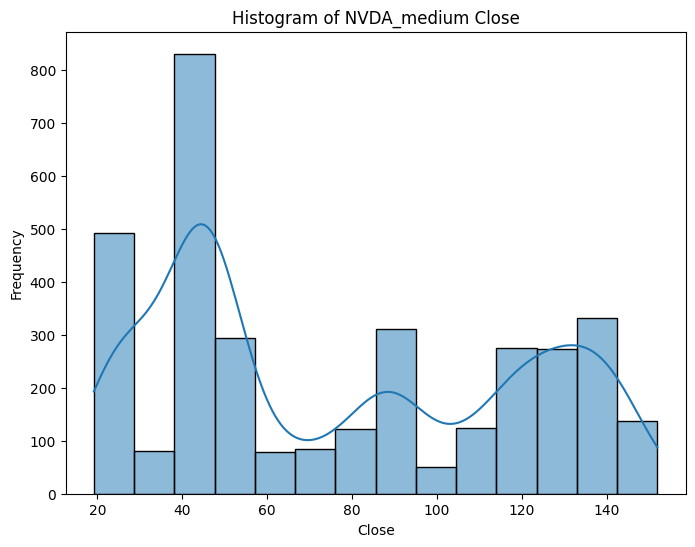

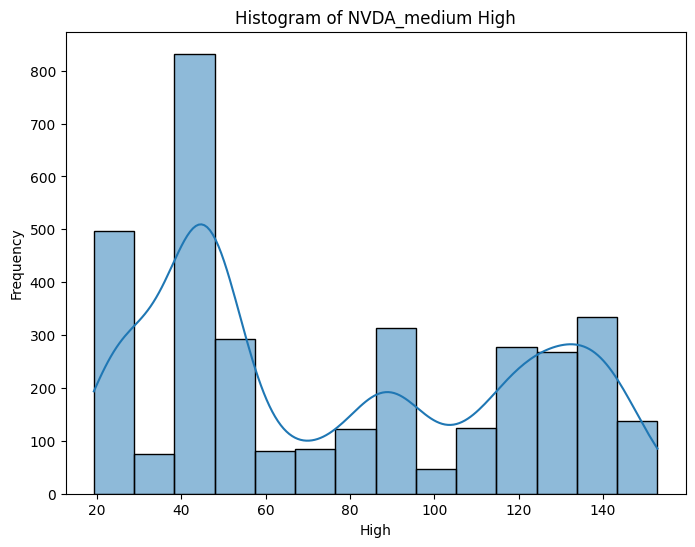

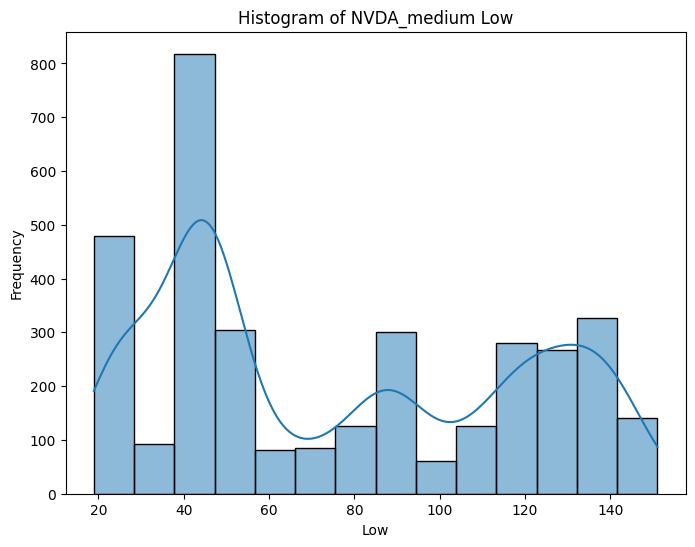

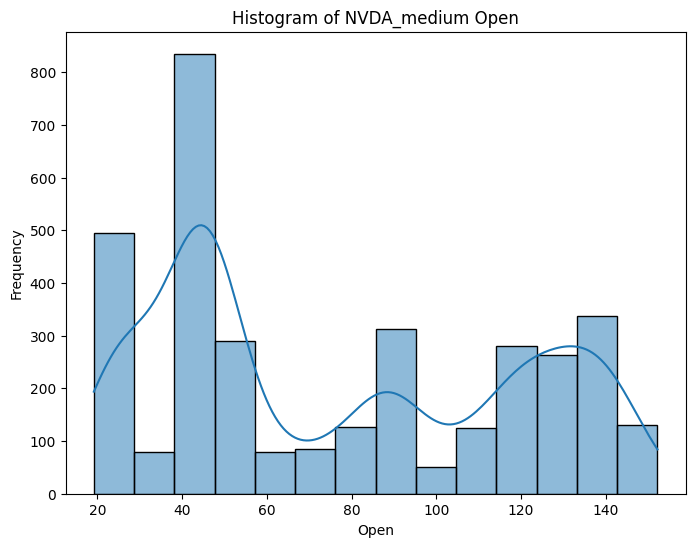

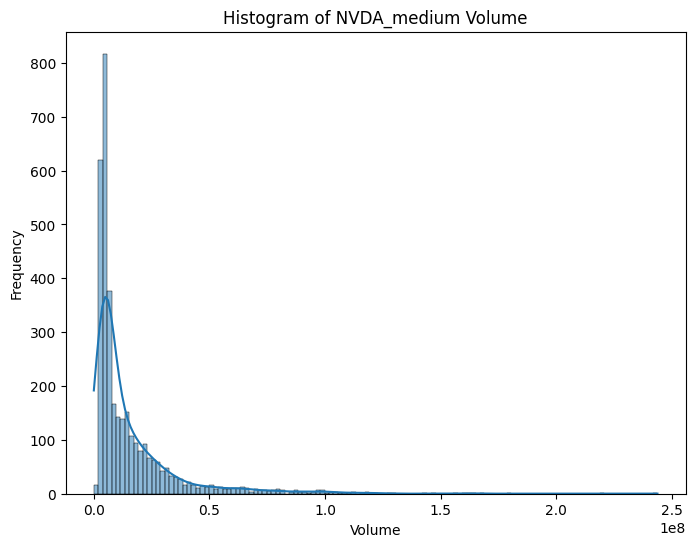

In [11]:
# Identify numerical columns
numerical_columns = nvda_medium_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(nvda_medium_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(nvda_medium_data[column], kde=True)
        plt.title(f'Histogram of NVDA_medium {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

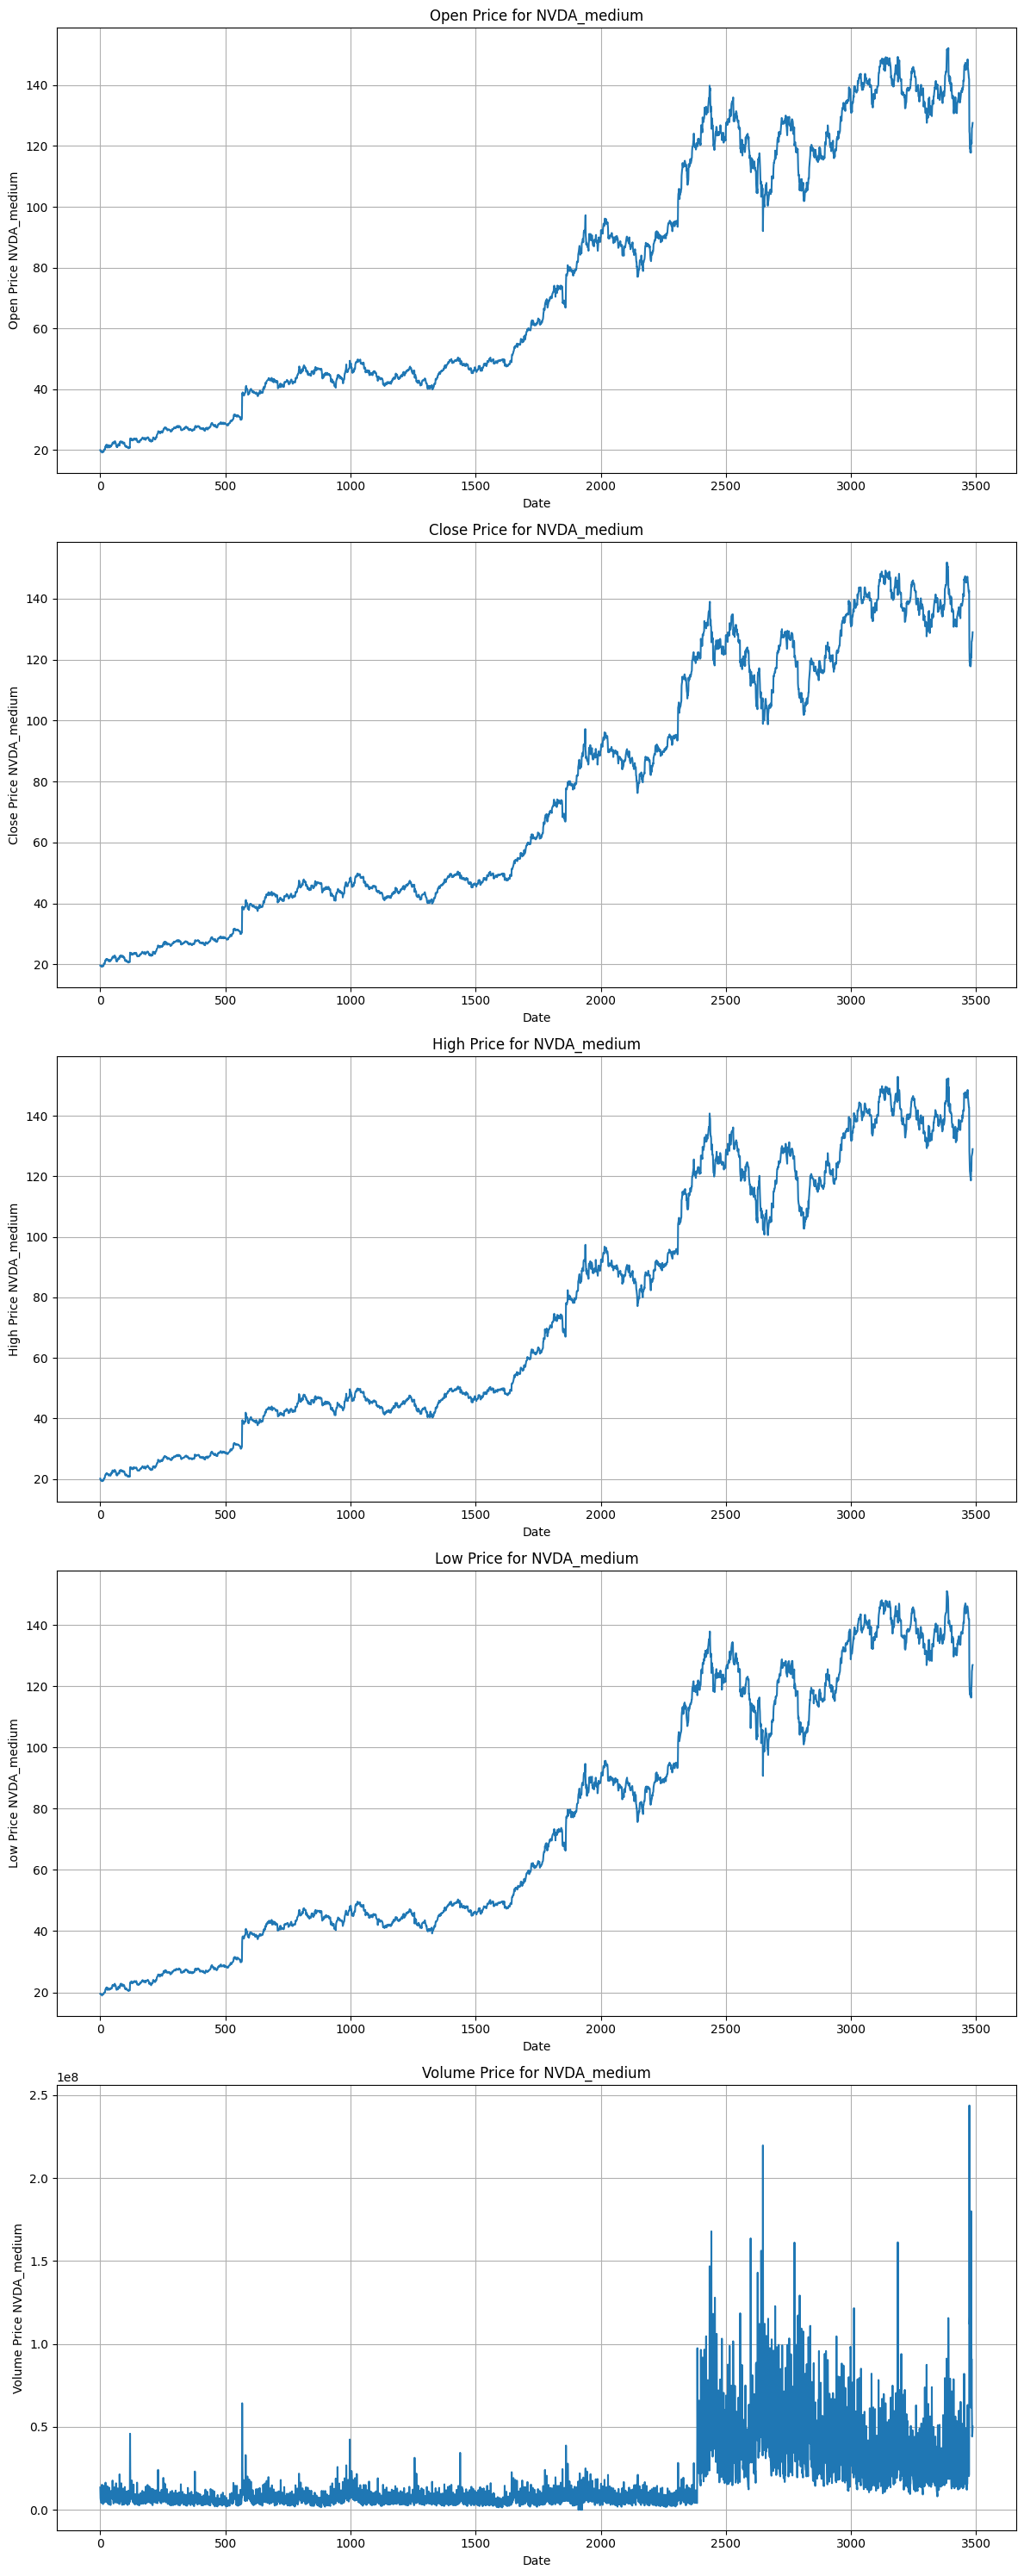

In [12]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(nvda_medium_data.index, nvda_medium_data[col])
    axes[i].set_title(f'{col} Price for NVDA_medium')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price NVDA_medium')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

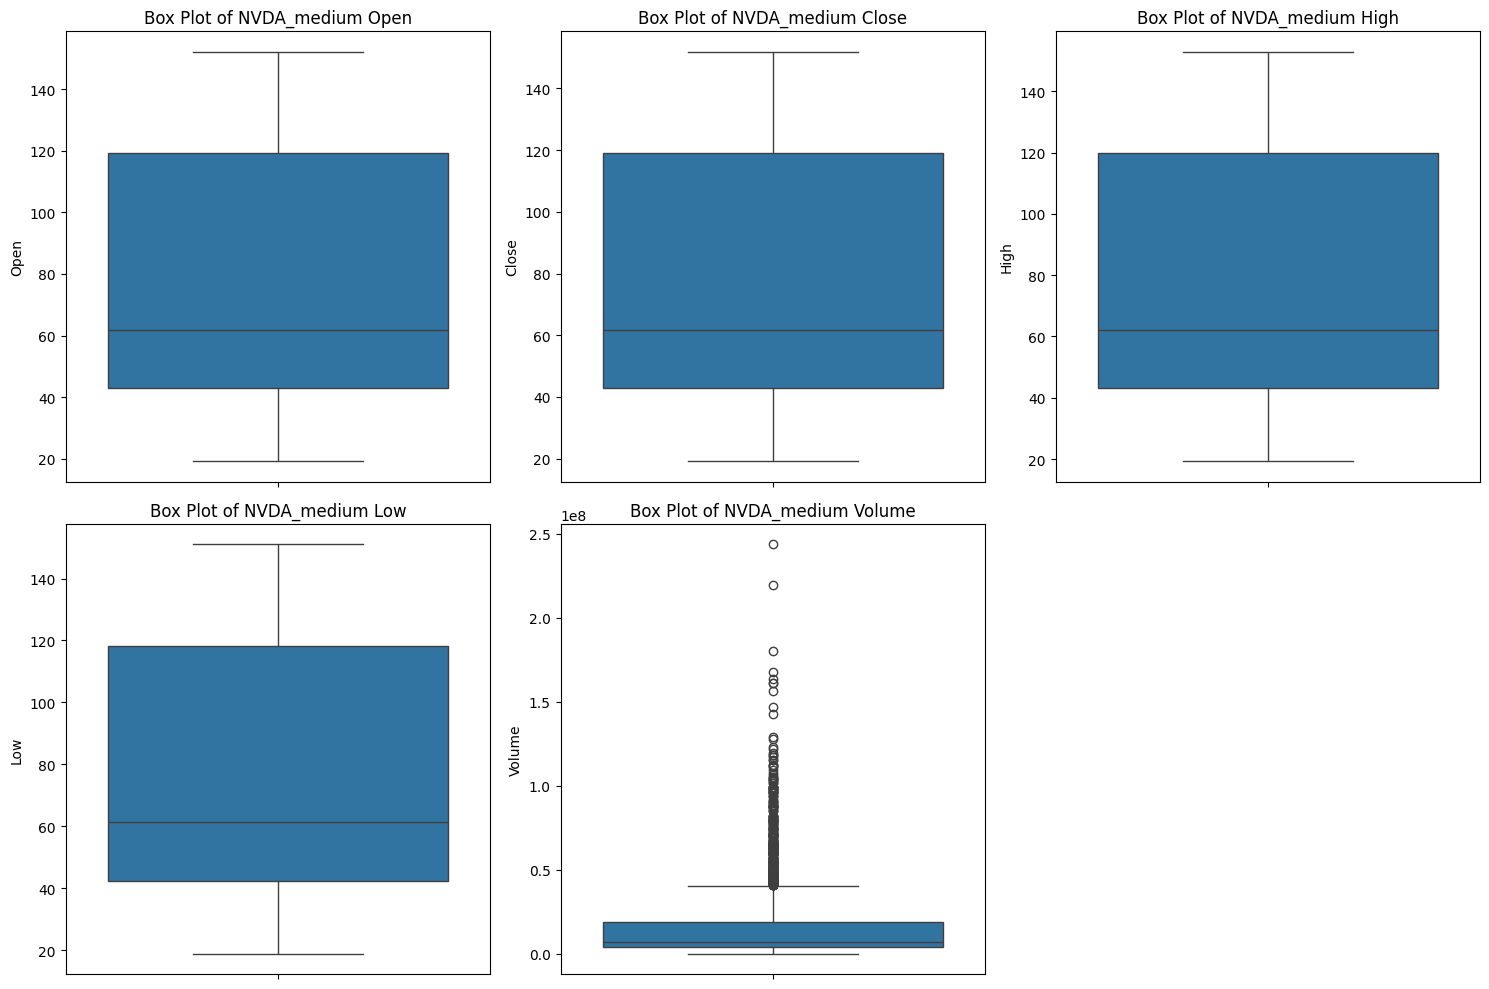

In [13]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=nvda_medium_data[col])
    plt.title(f'Box Plot of NVDA_medium {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

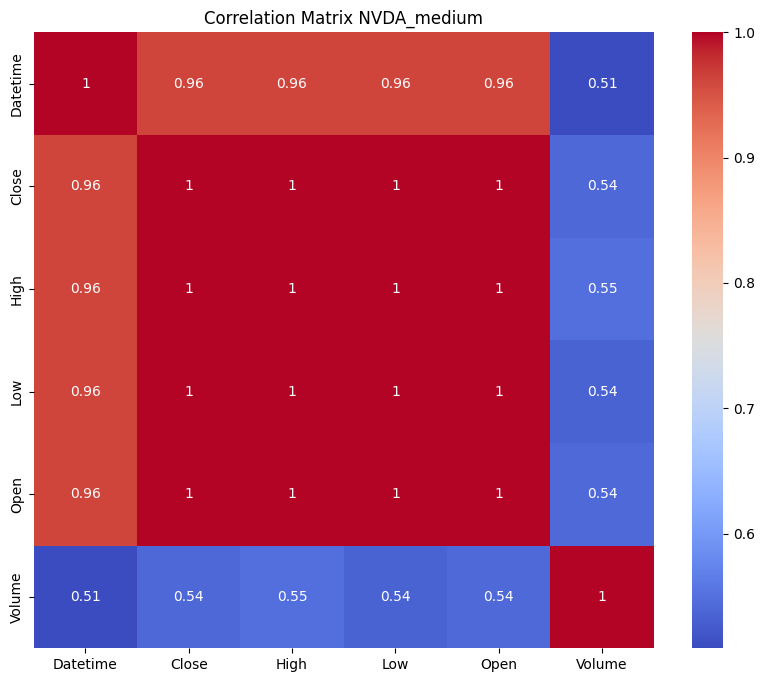

In [14]:
correlation_matrix = nvda_medium_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix NVDA_medium')
plt.show()

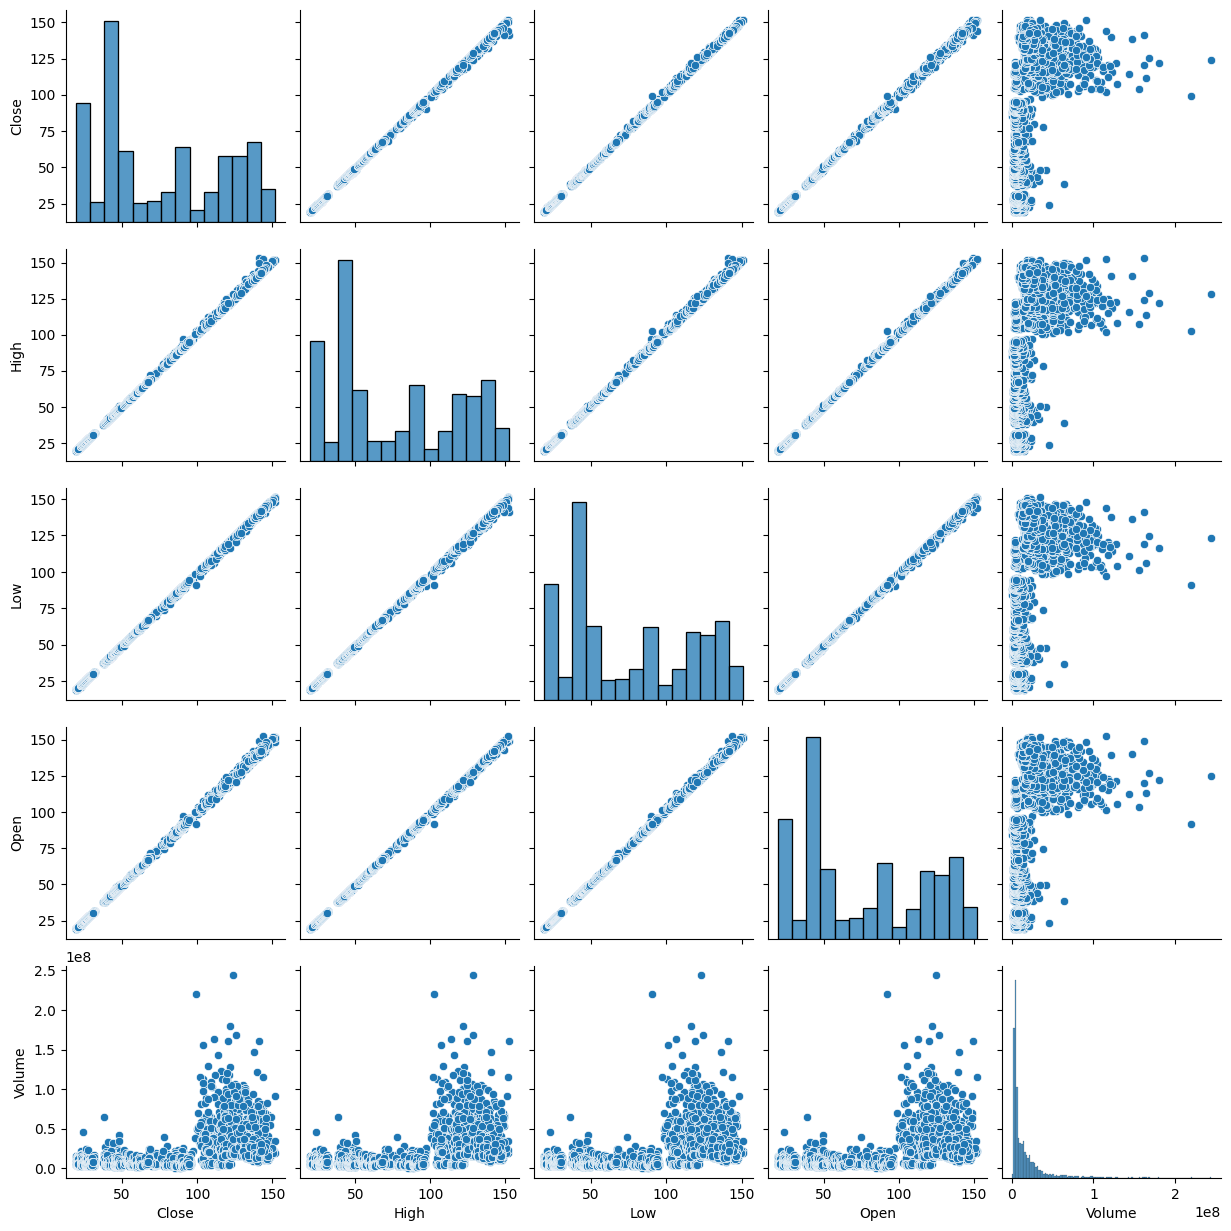

In [15]:
# pairs of numerical columns
sns.pairplot(nvda_medium_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'NVDA_medium Relationship between Close Price and Trading Volume')

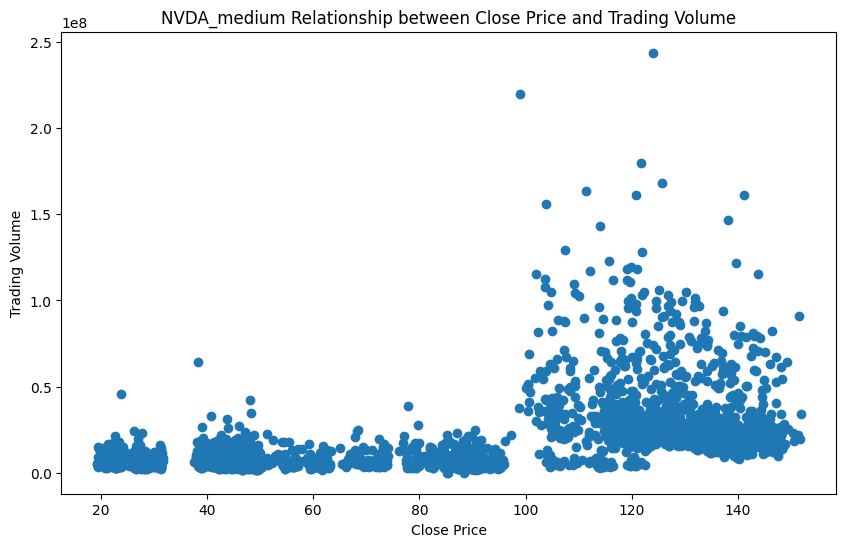

In [16]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(nvda_medium_data['Close'], nvda_medium_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('NVDA_medium Relationship between Close Price and Trading Volume')

# Feature Engineering

In [17]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
nvda_medium_data['SMA'] = nvda_medium_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
nvda_medium_data['StdDev'] = nvda_medium_data['Close'].rolling(window=window_sma).std()
nvda_medium_data['UpperBand'] = nvda_medium_data['SMA'] + (2 * nvda_medium_data['StdDev'])
nvda_medium_data['LowerBand'] = nvda_medium_data['SMA'] - (2 * nvda_medium_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

nvda_medium_data['RSI'] = calculate_rsi(nvda_medium_data)

In [18]:
nvda_medium_data

,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI
0,2023-01-30 14:30:00+00:00,19.635050,20.139999,19.511000,19.950001,13533186,NaN,NaN,NaN,NaN,NaN
1,2023-01-30 15:30:00+00:00,19.646000,19.696001,19.425030,19.638000,7116478,NaN,NaN,NaN,NaN,NaN
2,2023-01-30 16:30:00+00:00,19.521500,19.711500,19.478001,19.647999,5614872,NaN,NaN,NaN,NaN,NaN
3,2023-01-30 17:30:00+00:00,19.497999,19.570990,19.397999,19.521500,5285113,NaN,NaN,NaN,NaN,NaN
4,2023-01-30 18:30:00+00:00,19.394501,19.497999,19.352499,19.497219,4252225,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3482,2025-01-28 16:30:00+00:00,126.019997,126.639999,120.662003,120.770103,91004183,139.301249,6.117053,151.535355,127.067144,47.006647
3483,2025-01-28 17:30:00+00:00,126.089996,126.919998,124.917702,126.014999,61486818,139.241326,6.139069,151.519465,126.963188,46.344679
3484,2025-01-28 18:30:00+00:00,126.775002,127.400002,125.452400,126.084999,44202557,139.183094,6.156259,151.495611,126.870576,45.186351
3485,2025-01-28 19:30:00+00:00,127.590103,127.870003,126.639999,126.769997,46205682,139.127751,6.169454,151.466659,126.788844,45.627123


In [19]:
nvda_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,364
StdDev,364
UpperBand,364
LowerBand,364


In [20]:
# fill na with mean
nvda_medium_data.fillna(nvda_medium_data.mean(), inplace=True)

In [ ]:
nvda_medium_data.isna().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0
RSI,0


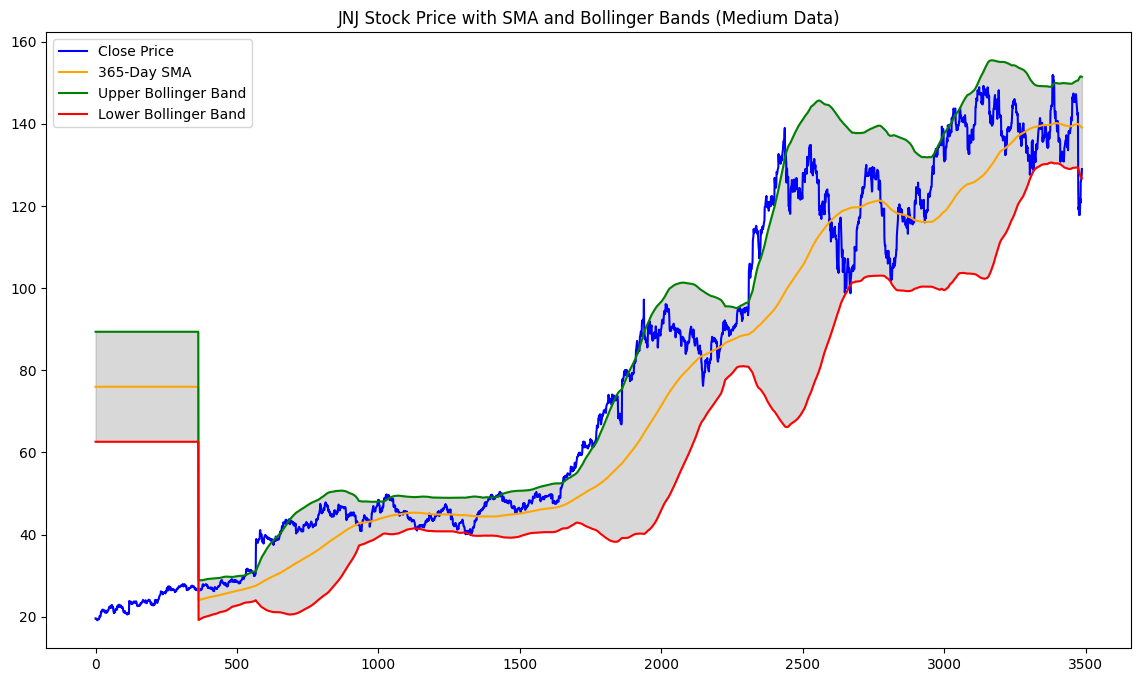

In [21]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(nvda_medium_data['Close'], label='Close Price', color='blue')
plt.plot(nvda_medium_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(nvda_medium_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(nvda_medium_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(nvda_medium_data.index, nvda_medium_data['UpperBand'], nvda_medium_data['LowerBand'], color='gray', alpha=0.3)
plt.title('JNJ Stock Price with SMA and Bollinger Bands (Medium Data)')
plt.legend()
plt.show()

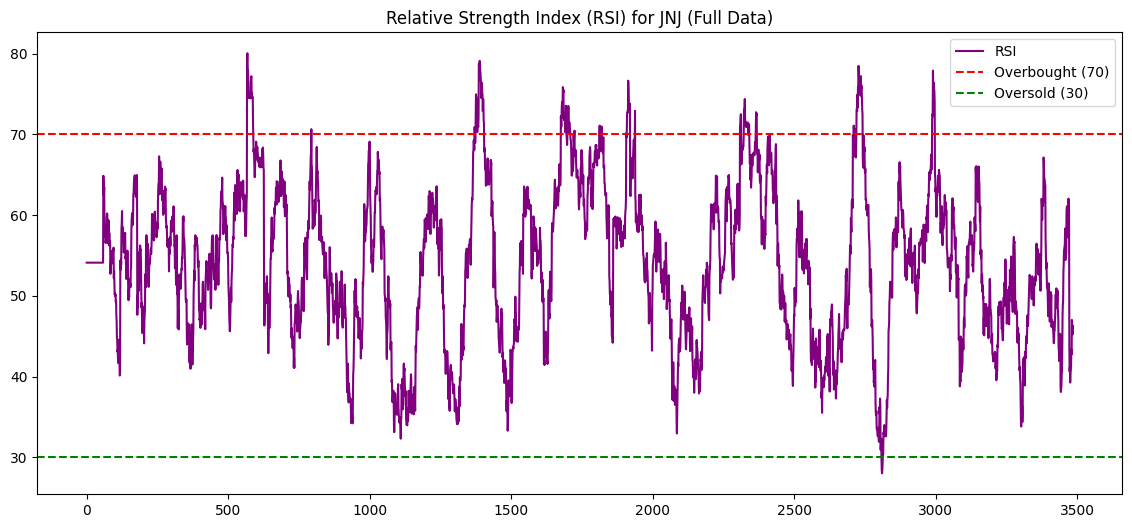

In [22]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(nvda_medium_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for JNJ (Full Data)')
plt.legend()
plt.show()

In [23]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


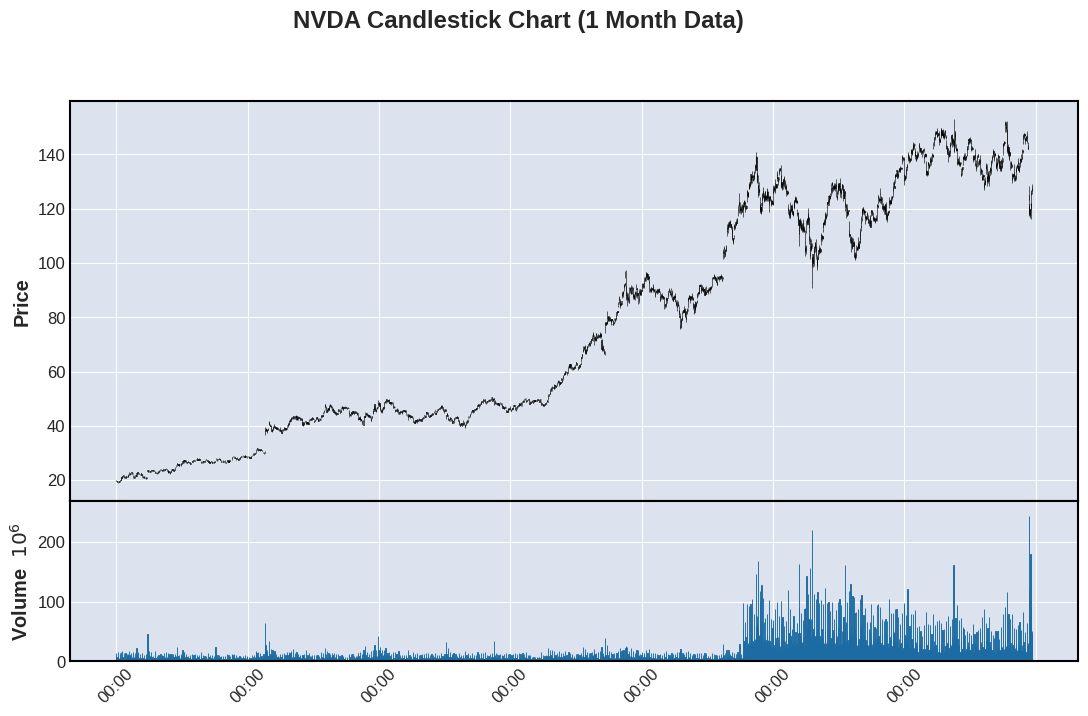

In [24]:
import mplfinance as mpf

# Ensure the index is a datetime object
nvda_medium_data.index = pd.to_datetime(nvda_medium_data.index)

# Plot candlestick chart
mpf.plot(nvda_medium_data, type='candle', volume=True, figsize=(14, 8),
         title='NVDA Candlestick Chart (1 Month Data)')

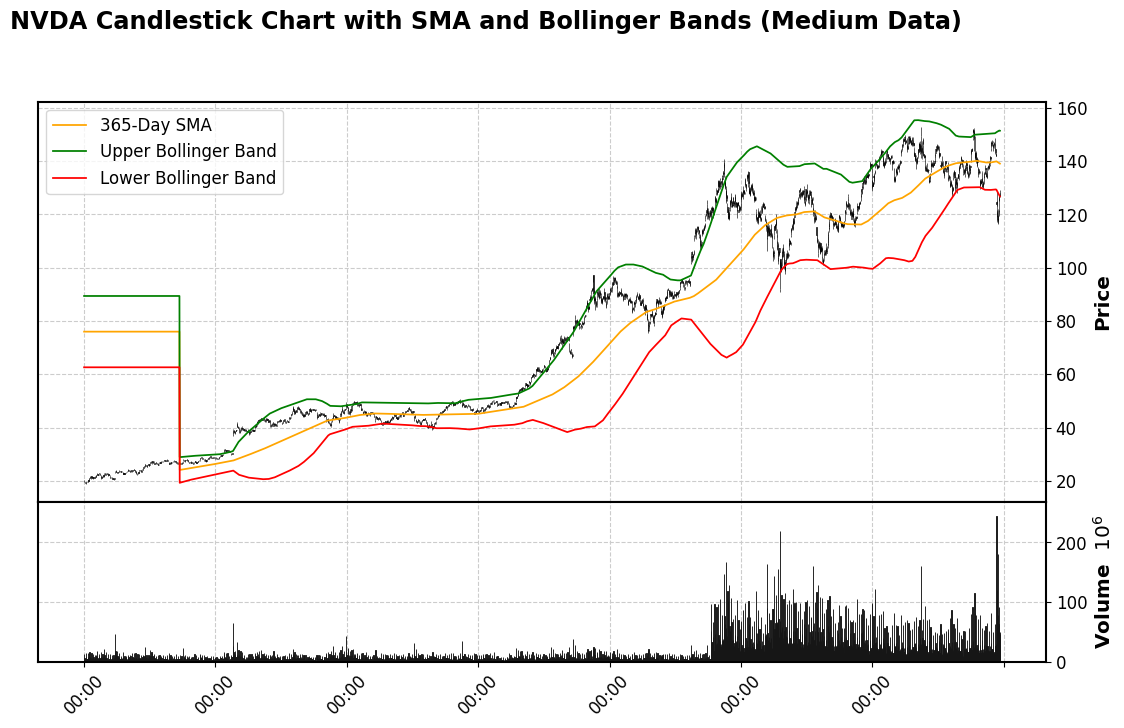

In [25]:
import mplfinance as mpf

ap = [
    mpf.make_addplot(nvda_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(nvda_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(nvda_medium_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    nvda_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='NVDA Candlestick Chart with SMA and Bollinger Bands (Medium Data)',
    style='classic'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

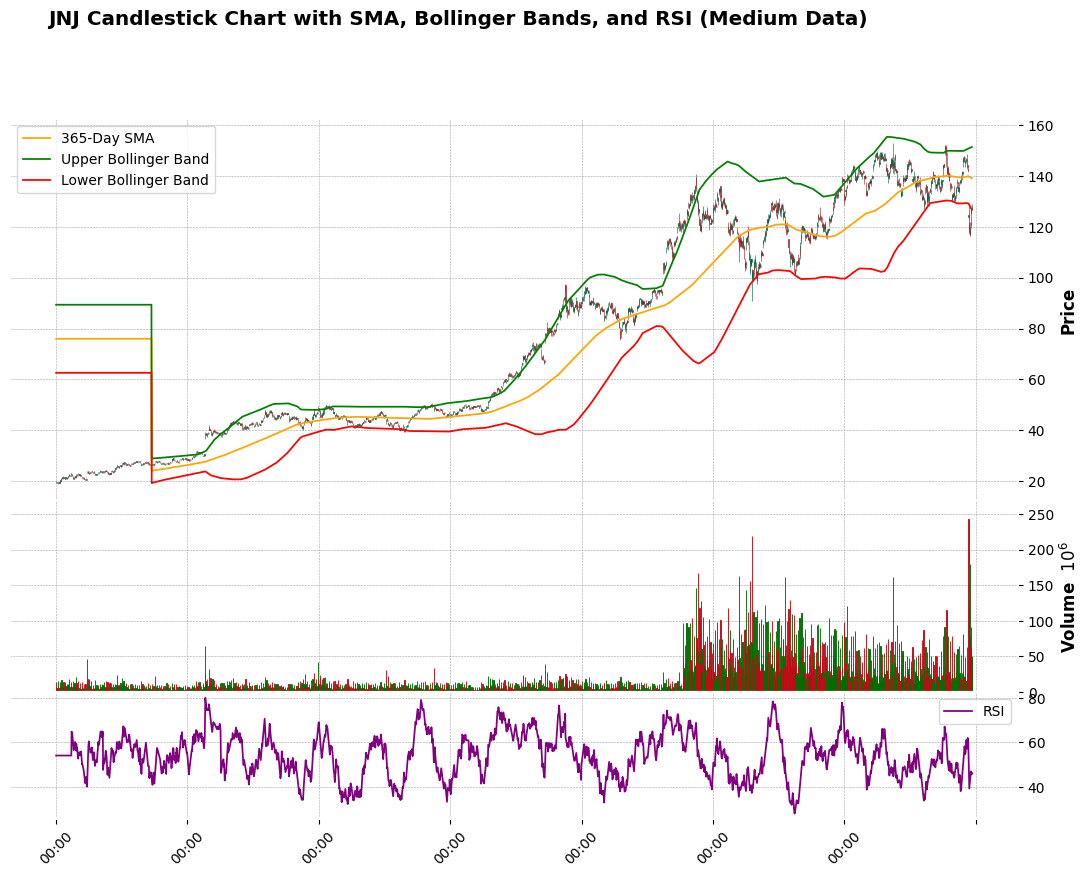

In [26]:
import mplfinance as mpf

ap = [
    mpf.make_addplot(nvda_medium_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(nvda_medium_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(nvda_medium_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(nvda_medium_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    nvda_medium_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='JNJ Candlestick Chart with SMA, Bollinger Bands, and RSI (Medium Data)',
    style='charles',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

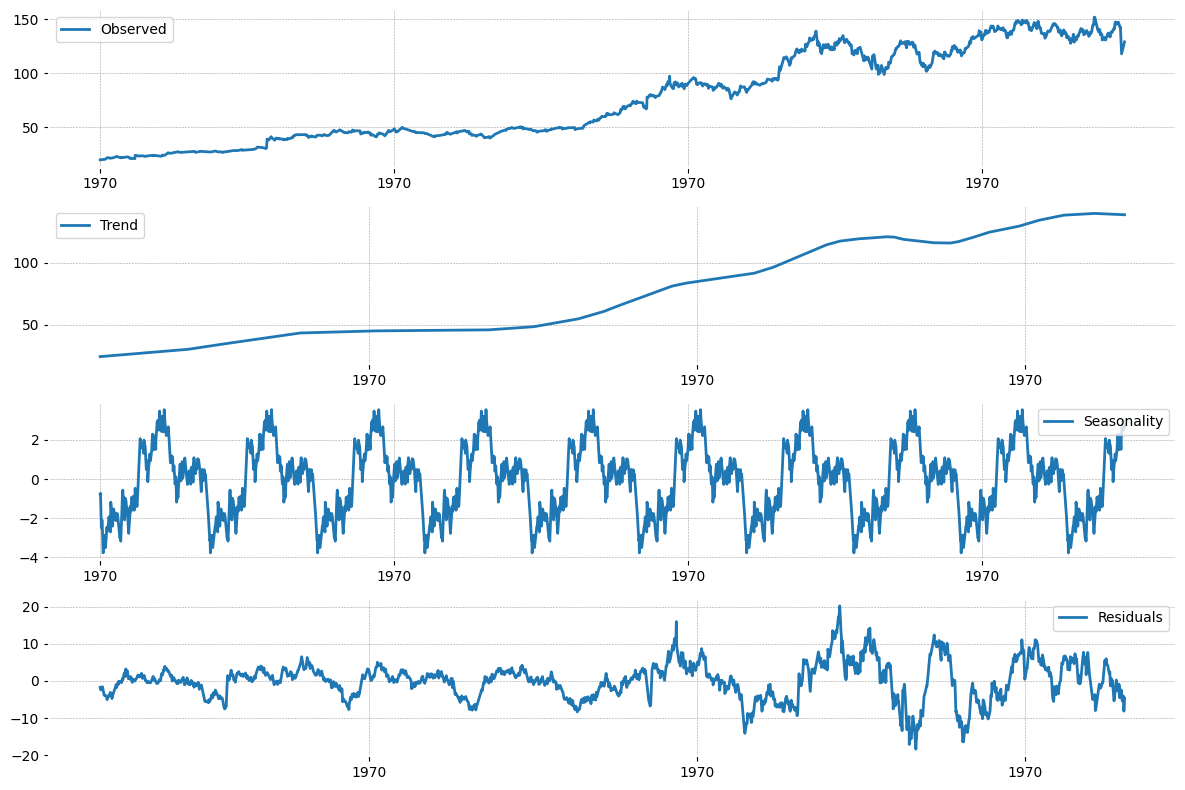

In [27]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(nvda_medium_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 1.21%


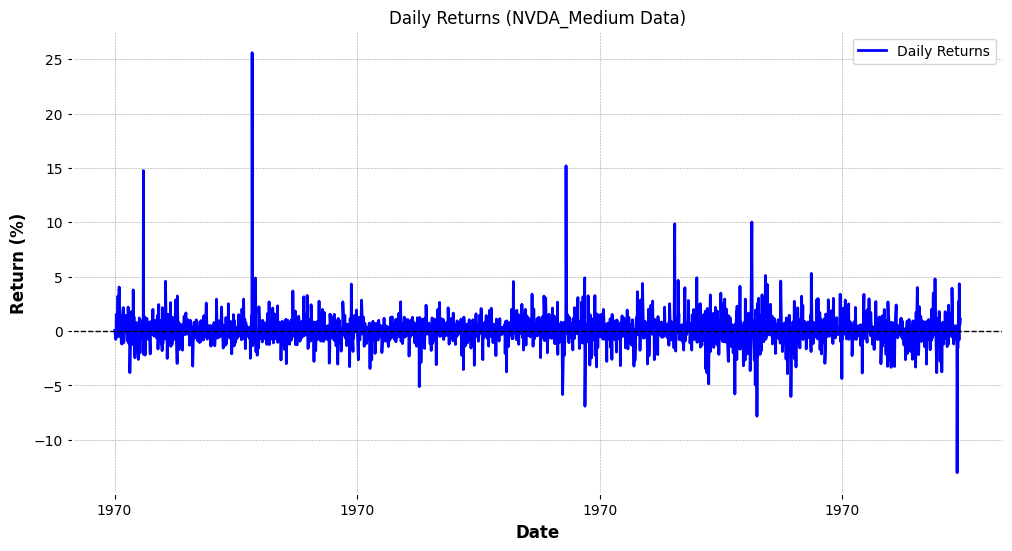

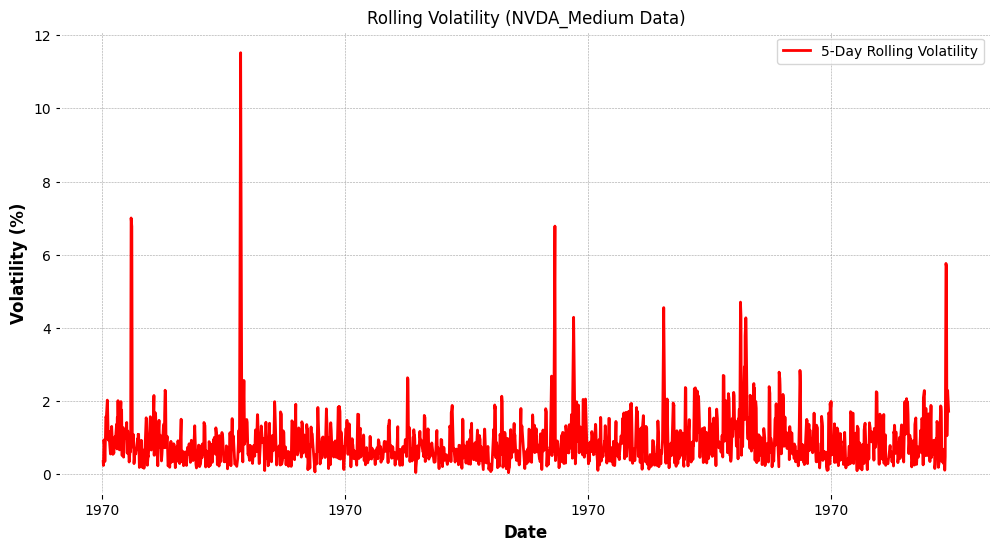

In [30]:
# Calculate daily returns
nvda_medium_data['Daily_Return'] = nvda_medium_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = nvda_medium_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(nvda_medium_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns (NVDA_Medium Data)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
nvda_medium_data['Rolling_Volatility'] = nvda_medium_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(nvda_medium_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility (NVDA_Medium Data)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

# Stationarity Test

In [31]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(nvda_medium_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -0.7015979549635699
p-value: 0.846335197233846
Critical Values:
   1%: -3.4322435658885047
   5%: -2.8623766691169186
   10%: -2.567215374070993
The data is non-stationary (fail to reject the null hypothesis).


In [32]:
# Apply differencing
nvda_medium_data['Close_diff'] = nvda_medium_data['Close'].diff().dropna()

In [33]:
nvda_medium_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [34]:
# drop na
nvda_medium_data.dropna(inplace=True)

In [35]:
# Recheck stationarity using ADF test
result = adfuller(nvda_medium_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -11.637025467160703
p-value: 2.1923332886374747e-21
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

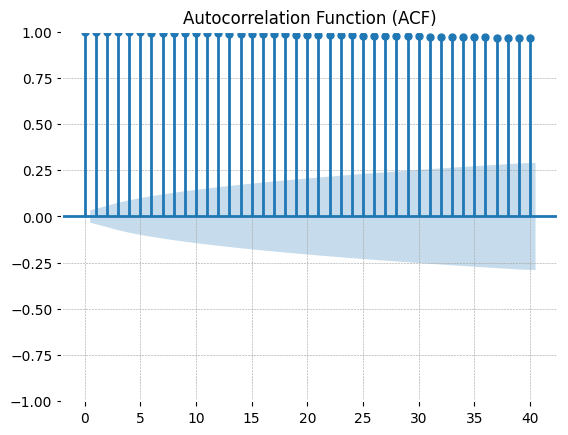

In [36]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_medium_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

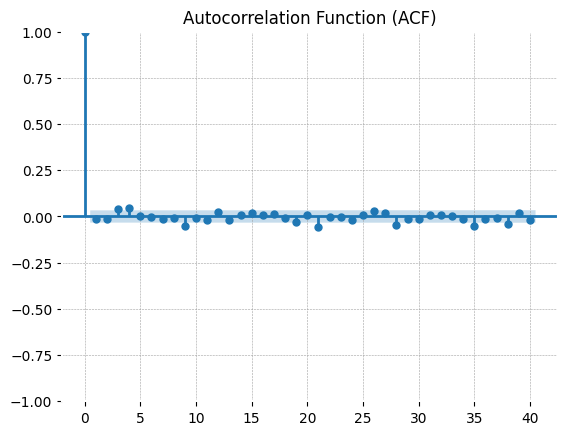

In [37]:
plt.figure(figsize=(10, 5))
plot_acf(nvda_medium_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
nvda_medium_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
nvda_medium_data = nvda_medium_data[['Datetime', 'Close_diff']]

In [ ]:
nvda_medium_data

,Datetime,Close_diff
0,2023-01-30 19:30:00+00:00,-0.147501
1,2023-01-30 20:30:00+00:00,-0.086000
2,2023-01-31 14:30:00+00:00,0.296001
3,2023-01-31 15:30:00+00:00,0.056999
4,2023-01-31 16:30:00+00:00,-0.070330
...,...,...
3477,2025-01-28 16:30:00+00:00,5.250000
3478,2025-01-28 17:30:00+00:00,0.070000
3479,2025-01-28 18:30:00+00:00,0.685005
3480,2025-01-28 19:30:00+00:00,0.815102


In [ ]:
nvda_medium_data

,Datetime,Close_diff
0,2023-01-30 19:30:00+00:00,-0.147501
1,2023-01-30 20:30:00+00:00,-0.086000
2,2023-01-31 14:30:00+00:00,0.296001
3,2023-01-31 15:30:00+00:00,0.056999
4,2023-01-31 16:30:00+00:00,-0.070330
...,...,...
3477,2025-01-28 16:30:00+00:00,5.250000
3478,2025-01-28 17:30:00+00:00,0.070000
3479,2025-01-28 18:30:00+00:00,0.685005
3480,2025-01-28 19:30:00+00:00,0.815102


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(nvda_medium_data) * 0.8)  # 80% for training
train_data = nvda_medium_data[:train_size]
test_data = nvda_medium_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [ ]:
train_data

,Close_diff
Datetime,
2023-01-30 19:30:00+00:00,-0.147501
2023-01-30 20:30:00+00:00,-0.086000
2023-01-31 14:30:00+00:00,0.296001
2023-01-31 15:30:00+00:00,0.056999
2023-01-31 16:30:00+00:00,-0.070330
...,...
2024-08-30 17:30:00+00:00,0.429199
2024-08-30 18:30:00+00:00,0.378296
2024-08-30 19:30:00+00:00,0.323204


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2023-01-30 19:30:00+0000', tz='UTC'),
 Timestamp('2024-09-03 14:30:00+0000', tz='UTC'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2024-09-03 15:30:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:30:00+0000', tz='UTC'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0404
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0021
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0025
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0023
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0023
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
29.567198991775513


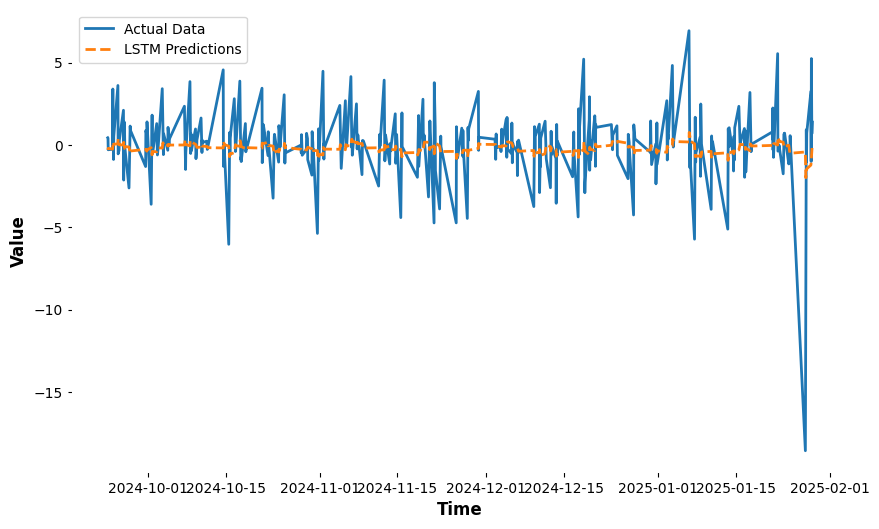

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

4454.604985555269


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

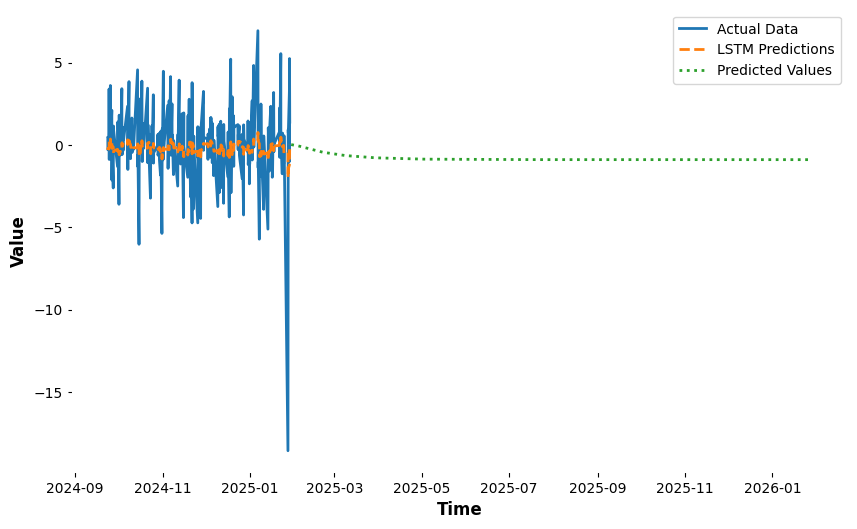

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()